In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tarfile
from six.moves import urllib
import quandl

In [0]:
df = quandl.get('WIKI/GOOGL')

In [3]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3424 entries, 2004-08-19 to 2018-03-27
Data columns (total 12 columns):
Open           3424 non-null float64
High           3424 non-null float64
Low            3424 non-null float64
Close          3424 non-null float64
Volume         3424 non-null float64
Ex-Dividend    3424 non-null float64
Split Ratio    3424 non-null float64
Adj. Open      3424 non-null float64
Adj. High      3424 non-null float64
Adj. Low       3424 non-null float64
Adj. Close     3424 non-null float64
Adj. Volume    3424 non-null float64
dtypes: float64(12)
memory usage: 347.8 KB


In [5]:
df.isnull().sum()

Open           0
High           0
Low            0
Close          0
Volume         0
Ex-Dividend    0
Split Ratio    0
Adj. Open      0
Adj. High      0
Adj. Low       0
Adj. Close     0
Adj. Volume    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff43af93a20>,
      dtype=object)

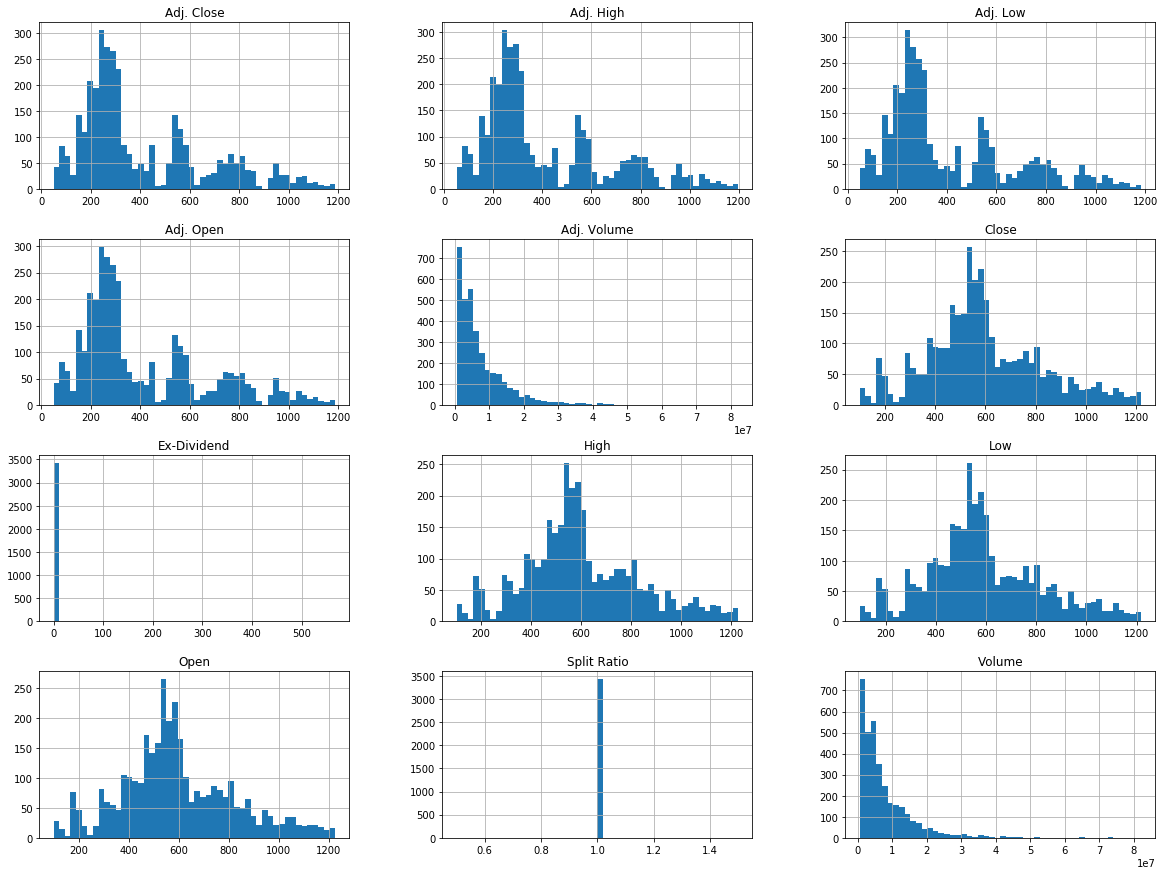

In [6]:
df.hist(bins=50,figsize=(20,15))

In [0]:
## find correlation first
corr_matrix = df.corr()

In [8]:
corr_matrix['Adj. Close']

Open           0.815542
High           0.815432
Low            0.815961
Close          0.816047
Volume        -0.550264
Ex-Dividend    0.010773
Split Ratio         NaN
Adj. Open      0.999758
Adj. High      0.999869
Adj. Low       0.999902
Adj. Close     1.000000
Adj. Volume   -0.550264
Name: Adj. Close, dtype: float64

In [9]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
      dtype='object')

In [0]:
col=['Open', 'High', 'Low', 'Close','Adj. Open', 'Adj. High', 'Adj. Low']

In [0]:
from pandas.plotting import scatter_matrix

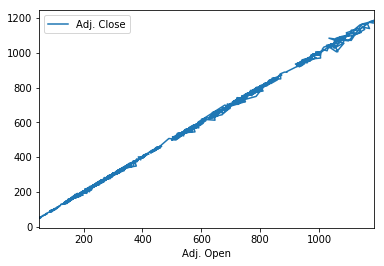

In [15]:
df.plot(x='Adj. Open',y='Adj. Close')

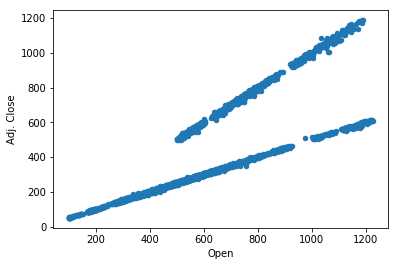

In [17]:
df.plot(kind='scatter',x='Open',y='Adj. Close')

In [0]:
df1 = df[col]

In [20]:
df1.head()

,Open,High,Low,Close,Adj. Open,Adj. High,Adj. Low
Date,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,50.159839,52.191109,48.128568
2004-08-20,101.01,109.08,100.50,108.310,50.661387,54.708881,50.405597
2004-08-23,110.76,113.48,109.05,109.400,55.551482,56.915693,54.693835
2004-08-24,111.24,111.60,103.57,104.870,55.792225,55.972783,51.945350
2004-08-25,104.76,108.00,103.88,106.000,52.542193,54.167209,52.100830


In [21]:
df1.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj. Open    0
Adj. High    0
Adj. Low     0
dtype: int64

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,Imputer

In [25]:
## create pipeline
##num_pipeline = Pipeline([('imputer',Imputer(strategy='median')),
                        ('std_sclar',StandardScaler())])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
#3eature_matrix=num_pipeline.fit_transform(df1)

In [0]:
##X = pd.DataFrame(feature_matrix,columns = col)

In [29]:
##X.head()
df1.head()

,Open,High,Low,Close,Adj. Open,Adj. High,Adj. Low
Date,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,50.159839,52.191109,48.128568
2004-08-20,101.01,109.08,100.50,108.310,50.661387,54.708881,50.405597
2004-08-23,110.76,113.48,109.05,109.400,55.551482,56.915693,54.693835
2004-08-24,111.24,111.60,103.57,104.870,55.792225,55.972783,51.945350
2004-08-25,104.76,108.00,103.88,106.000,52.542193,54.167209,52.100830


In [0]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [0]:
df1=normalize(df1)

In [33]:
df1.head()

,Open,High,Low,Close,Adj. Open,Adj. High,Adj. Low
Date,,,,,,,
2004-08-19,0.000816,0.002058,0.000000,0.000290,0.000405,0.001014,0.000000
2004-08-20,0.001703,0.006512,0.004044,0.007410,0.000846,0.003210,0.002005
2004-08-23,0.010348,0.010416,0.011660,0.008383,0.005142,0.005134,0.005780
2004-08-24,0.010774,0.008748,0.006779,0.004339,0.005353,0.004312,0.003360
2004-08-25,0.005028,0.005554,0.007055,0.005347,0.002498,0.002737,0.003497


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff42b7d8080>,
      dtype=object)

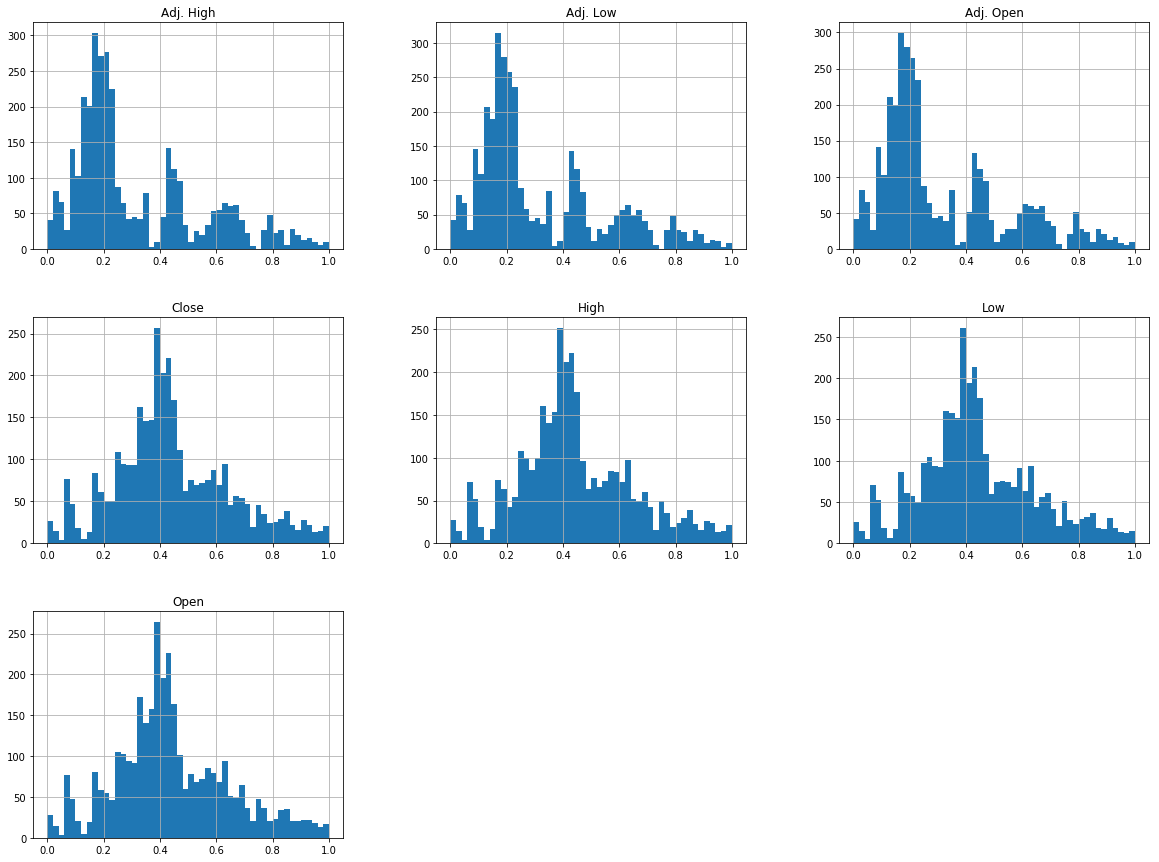

In [34]:
df1.hist(bins=50,figsize=(20,15))

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lr = LinearRegression()

In [37]:
lr.fit(df1,df['Adj. Close'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
prediction=lr.predict(df1)

In [0]:
from sklearn.metrics import mean_squared_error

In [0]:
lin_mse = mean_squared_error(df['Adj. Close'],prediction)

In [42]:
lin_mse

0.699245857525456